In [79]:
import re
import pandas as pd
from datetime import datetime as dt

In [80]:
f=open('WhatsApp Chat with Compiler (VI Sem, Sec-G).txt',encoding='utf-8')
f1=open("WhatsApp Chat with Mentor_shashi_2024.txt",encoding='utf-8')

In [81]:
data=f.read()
data1=f1.read()
# type(data)


In [111]:
data1 = data1.replace('\u202F', ' ')

In [112]:
# print(data)

In [113]:
print(data1)

3/29/23, 7:02 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
3/29/23, 6:56 PM - Shashi Sharma_ Crt Mentor created group "Mentor_shashi_2024"
3/29/23, 7:02 PM - Shashi Sharma_ Crt Mentor added you
3/29/23, 7:04 PM - Shashi Sharma_ Crt Mentor added +91 90792 79261, +91 94082 77553, +91 94628 82922, +91 95217 31368, and +91 97722 60500
3/29/23, 7:06 PM - Shashi Sharma_ Crt Mentor added +91 80034 45673
3/29/23, 7:07 PM - Shashi Sharma_ Crt Mentor: <Media omitted>
3/29/23, 7:07 PM - Shashi Sharma_ Crt Mentor: <Media omitted>
3/29/23, 7:08 PM - Shashi Sharma_ Crt Mentor: Please see your sitting arrangement and Timetable of CRT
3/29/23, 8:26 PM - Shashi Sharma_ Crt Mentor: This message was deleted
3/29/23, 8:27 PM - Shashi Sharma_ Crt Mentor: Dear all, 

Greeting of the day!! 

Pls inform ur mentees. 

1. 100% attendance is compulsory in CRT Classes. 

2. All should be on time. Late means Absent.

In [147]:
pattern='\d{1,2}/\d{1,2}/\d{2},\s\d{2}:\d{2}\s-\s'
pattern1='\d{1,2}/\d{1,2}/\d{2},\s\d{1,2}:\d{2}.{6}'

In [148]:
message=re.split(pattern1,data1)[1:]
len(message)

1260

In [149]:
s="3/31/23, 8:33 PM - +91 96803 01918: Yess ma'am section f has got the msg"
re.split(pattern1,s)[1:]

["+91 96803 01918: Yess ma'am section f has got the msg"]

In [150]:
# print(message)

In [151]:
Dates=re.findall(pattern1,data1)

In [156]:
# Dates

In [164]:
df=pd.DataFrame({'user_msg' : message,'msg_date': Dates})
cleaned_data = [re.sub(r'[^0-9/:APMapm\s-]', '', date) for date in df['msg_date']]



series_object_datetime = pd.to_datetime(cleaned_data, format='%m/%d/%y, %I:%M %p -')
# convert string object into datetime object 
# pd.to_datetime(df['msg_date'] , format='%m/%d/%y, %I:%M %p -')
# df['msg_date'] = df['msg_date'].dt.strftime('%m/%d/%y, %I:%M  %p')
# df.rename(columns={'msg_date':'Dates'},inplace=True)
# df.head(10)

ValueError: time data '3/29/23 7:02 PM - ' does not match format '%m/%d/%y, %I:%M %p -' (match)

In [11]:
# seperate users and msgs

users=[]
msg=[]
for a in df['user_msg']:
    entry=re.split('([\w\W]+?):\s',a)
    if entry[1:]:
        users.append(entry[1])
        msg.append(entry[2])
    else:
        users.append('group-notification')
        msg.append(entry[0])
df['User']=users
df['Message']=msg
df.drop(columns='user_msg',inplace=True)
df.drop(columns='Dates',inplace=True)
df.head(10)

,msg-date,User,Message
0,2022-08-18 09:18:00,group-notification,"Swikruti Nayak created group ""V Sem-Sec G (Off..."
1,2022-08-18 09:18:00,group-notification,You were added\n
2,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n
3,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n
4,2022-09-27 11:48:00,Swikruti Nayak,<Media omitted>\n
5,2022-09-28 14:12:00,Swikruti Nayak,<Media omitted>\n
6,2022-09-28 14:12:00,Swikruti Nayak,<Media omitted>\n
7,2022-10-01 19:52:00,Swikruti Nayak,This message was deleted\n
8,2022-10-06 09:09:00,Swikruti Nayak,<Media omitted>\n
9,2022-10-08 09:33:00,Swikruti Nayak,Good morning students\n\nI hope all are doing ...


In [12]:
df.rename(columns={'msg-date':'Dates'},inplace=True)

In [13]:
df.head()

,Dates,User,Message
0,2022-08-18 09:18:00,group-notification,"Swikruti Nayak created group ""V Sem-Sec G (Off..."
1,2022-08-18 09:18:00,group-notification,You were added\n
2,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n
3,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n
4,2022-09-27 11:48:00,Swikruti Nayak,<Media omitted>\n


In [14]:
df['Year']=df['Dates'].dt.year
df['Month']=df['Dates'].dt.month_name()
df['Day']=df['Dates'].dt.day
df['Hour']=df['Dates'].dt.hour
df['Minute']=df['Dates'].dt.minute
df.head(10)

,Dates,User,Message,Year,Month,Day,Hour,Minute
0,2022-08-18 09:18:00,group-notification,"Swikruti Nayak created group ""V Sem-Sec G (Off...",2022,August,18,9,18
1,2022-08-18 09:18:00,group-notification,You were added\n,2022,August,18,9,18
2,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30
3,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30
4,2022-09-27 11:48:00,Swikruti Nayak,<Media omitted>\n,2022,September,27,11,48
5,2022-09-28 14:12:00,Swikruti Nayak,<Media omitted>\n,2022,September,28,14,12
6,2022-09-28 14:12:00,Swikruti Nayak,<Media omitted>\n,2022,September,28,14,12
7,2022-10-01 19:52:00,Swikruti Nayak,This message was deleted\n,2022,October,1,19,52
8,2022-10-06 09:09:00,Swikruti Nayak,<Media omitted>\n,2022,October,6,9,9
9,2022-10-08 09:33:00,Swikruti Nayak,Good morning students\n\nI hope all are doing ...,2022,October,8,9,33


In [15]:
df[df["User"]=="Swikruti Nayak"].shape[0]

739

In [16]:
words=[]
for msg in df['Message']:
    words.extend(msg.split())
len(words)

11242

In [17]:
df[df["Message"]=="<Media omitted>\n"].shape[0]

591

In [18]:
df.head(7)

,Dates,User,Message,Year,Month,Day,Hour,Minute
0,2022-08-18 09:18:00,group-notification,"Swikruti Nayak created group ""V Sem-Sec G (Off...",2022,August,18,9,18
1,2022-08-18 09:18:00,group-notification,You were added\n,2022,August,18,9,18
2,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30
3,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30
4,2022-09-27 11:48:00,Swikruti Nayak,<Media omitted>\n,2022,September,27,11,48
5,2022-09-28 14:12:00,Swikruti Nayak,<Media omitted>\n,2022,September,28,14,12
6,2022-09-28 14:12:00,Swikruti Nayak,<Media omitted>\n,2022,September,28,14,12


In [19]:
x=df['User'].value_counts().head()
x

Swikruti Nayak      739
Sangat               68
Alok Sharma          57
+91 6239 565 852     47
+91 73579 21114      43
Name: User, dtype: int64

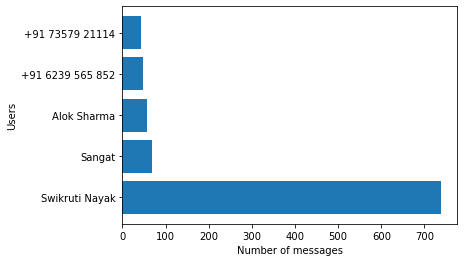

In [20]:
import matplotlib.pyplot as plt
name=x.index
count=x.values
plt.barh(name,count)
plt.xlabel("Number of messages")
plt.ylabel("Users")

plt.show()

In [23]:
# new_df=round((df['User'].value_counts()/df.shape[0])*100,2).reset_index()


In [24]:
# new_df.rename(columns={'index':'Name','User':'Percentage'})

In [21]:
df.head()

,Dates,User,Message,Year,Month,Day,Hour,Minute
0,2022-08-18 09:18:00,group-notification,"Swikruti Nayak created group ""V Sem-Sec G (Off...",2022,August,18,9,18
1,2022-08-18 09:18:00,group-notification,You were added\n,2022,August,18,9,18
2,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30
3,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30
4,2022-09-27 11:48:00,Swikruti Nayak,<Media omitted>\n,2022,September,27,11,48


In [22]:
# user m se group-notification
# mesage m se media omiited
# 


In [25]:
temp=df[df["User"]!="group-notification"]
temp=temp[temp['Message']!="<Media omitted>\n"]
temp

,Dates,User,Message,Year,Month,Day,Hour,Minute
7,2022-10-01 19:52:00,Swikruti Nayak,This message was deleted\n,2022,October,1,19,52
9,2022-10-08 09:33:00,Swikruti Nayak,Good morning students\n\nI hope all are doing ...,2022,October,8,9,33
10,2022-10-08 09:34:00,Swikruti Nayak,Can anyone tell me in FLAT subject how much co...,2022,October,8,9,34
12,2022-10-08 10:31:00,Himanshi,We are done with pumping lemma and regular lan...,2022,October,8,10,31
13,2022-10-08 10:32:00,Swikruti Nayak,Ok\n,2022,October,8,10,32
...,...,...,...,...,...,...,...,...
1681,2023-07-04 17:53:00,Navidha,😂\n,2023,July,4,17,53
1682,2023-07-04 17:53:00,Swikruti Nayak,CRT ka part hai\n,2023,July,4,17,53
1683,2023-07-04 17:53:00,Swikruti Nayak,Hadd hai\n,2023,July,4,17,53
1684,2023-07-04 17:54:00,+91 73579 21114,Sorry ma'am aaj krte hai start..🥹\n,2023,July,4,17,54


In [26]:
f=open("stop_hinglish.txt",'r')
stop_words=f.read()
# print(stop_words)

In [27]:
words=[]
for message in temp['Message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [28]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,students,153
1,ma'am,77
2,message,72
3,form,56
4,deleted,52
5,test,49
6,today,44
7,fill,41
8,sem,35
9,mam,34


In [29]:
df

,Dates,User,Message,Year,Month,Day,Hour,Minute
0,2022-08-18 09:18:00,group-notification,"Swikruti Nayak created group ""V Sem-Sec G (Off...",2022,August,18,9,18
1,2022-08-18 09:18:00,group-notification,You were added\n,2022,August,18,9,18
2,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30
3,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30
4,2022-09-27 11:48:00,Swikruti Nayak,<Media omitted>\n,2022,September,27,11,48
...,...,...,...,...,...,...,...,...
1681,2023-07-04 17:53:00,Navidha,😂\n,2023,July,4,17,53
1682,2023-07-04 17:53:00,Swikruti Nayak,CRT ka part hai\n,2023,July,4,17,53
1683,2023-07-04 17:53:00,Swikruti Nayak,Hadd hai\n,2023,July,4,17,53
1684,2023-07-04 17:54:00,+91 73579 21114,Sorry ma'am aaj krte hai start..🥹\n,2023,July,4,17,54


In [30]:
df['month_num']=df['Dates'].dt.month

In [36]:
timeline=df.groupby(['month_num','Year','Month']).count()['Message'].reset_index()

In [37]:
timeline

,month_num,Year,Month,Message
0,1,2023,January,132
1,2,2023,February,281
2,3,2023,March,310
3,4,2023,April,88
4,5,2023,May,153
5,6,2023,June,152
6,7,2023,July,17
7,8,2022,August,2
8,9,2022,September,5
9,10,2022,October,114


In [39]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['Month'][i]+'-'+str(timeline['Year'][i]))
     
# time

['January-2023',
 'February-2023',
 'March-2023',
 'April-2023',
 'May-2023',
 'June-2023',
 'July-2023',
 'August-2022',
 'September-2022',
 'October-2022',
 'November-2022',
 'December-2022']

In [40]:
timeline['time']=time
timeline

,month_num,Year,Month,Message,time
0,1,2023,January,132,January-2023
1,2,2023,February,281,February-2023
2,3,2023,March,310,March-2023
3,4,2023,April,88,April-2023
4,5,2023,May,153,May-2023
5,6,2023,June,152,June-2023
6,7,2023,July,17,July-2023
7,8,2022,August,2,August-2022
8,9,2022,September,5,September-2022
9,10,2022,October,114,October-2022


In [65]:
df

,Dates,User,Message,Year,Month,Day,Hour,Minute,month_num,year,date
0,2022-08-18 09:18:00,group-notification,"Swikruti Nayak created group ""V Sem-Sec G (Off...",2022,August,18,9,18,8,2022,2022-08-18
1,2022-08-18 09:18:00,group-notification,You were added\n,2022,August,18,9,18,8,2022,2022-08-18
2,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30,9,2022,2022-09-22
3,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30,9,2022,2022-09-22
4,2022-09-27 11:48:00,Swikruti Nayak,<Media omitted>\n,2022,September,27,11,48,9,2022,2022-09-27
...,...,...,...,...,...,...,...,...,...,...,...
1681,2023-07-04 17:53:00,Navidha,😂\n,2023,July,4,17,53,7,2023,2023-07-04
1682,2023-07-04 17:53:00,Swikruti Nayak,CRT ka part hai\n,2023,July,4,17,53,7,2023,2023-07-04
1683,2023-07-04 17:53:00,Swikruti Nayak,Hadd hai\n,2023,July,4,17,53,7,2023,2023-07-04
1684,2023-07-04 17:54:00,+91 73579 21114,Sorry ma'am aaj krte hai start..🥹\n,2023,July,4,17,54,7,2023,2023-07-04


In [66]:
df['date']=df['Dates'].dt.date

In [68]:
daily=df.groupby(['date']).count()['Message'].reset_index()

In [69]:
daily

,date,Message
0,2022-08-18,2
1,2022-09-22,2
2,2022-09-27,1
3,2022-09-28,2
4,2022-10-01,1
...,...,...
165,2023-06-24,1
166,2023-06-26,30
167,2023-06-27,13
168,2023-06-28,4


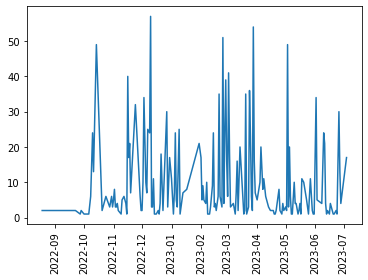

In [74]:
plt.plot(daily['date'],daily["Message"])
plt.xticks(rotation='vertical')
plt.show()

In [75]:
df

,Dates,User,Message,Year,Month,Day,Hour,Minute,month_num,year,date
0,2022-08-18 09:18:00,group-notification,"Swikruti Nayak created group ""V Sem-Sec G (Off...",2022,August,18,9,18,8,2022,2022-08-18
1,2022-08-18 09:18:00,group-notification,You were added\n,2022,August,18,9,18,8,2022,2022-08-18
2,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30,9,2022,2022-09-22
3,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30,9,2022,2022-09-22
4,2022-09-27 11:48:00,Swikruti Nayak,<Media omitted>\n,2022,September,27,11,48,9,2022,2022-09-27
...,...,...,...,...,...,...,...,...,...,...,...
1681,2023-07-04 17:53:00,Navidha,😂\n,2023,July,4,17,53,7,2023,2023-07-04
1682,2023-07-04 17:53:00,Swikruti Nayak,CRT ka part hai\n,2023,July,4,17,53,7,2023,2023-07-04
1683,2023-07-04 17:53:00,Swikruti Nayak,Hadd hai\n,2023,July,4,17,53,7,2023,2023-07-04
1684,2023-07-04 17:54:00,+91 73579 21114,Sorry ma'am aaj krte hai start..🥹\n,2023,July,4,17,54,7,2023,2023-07-04


In [76]:
df['day-name']=df["Dates"].dt.day_name()

In [77]:
df

,Dates,User,Message,Year,Month,Day,Hour,Minute,month_num,year,date,day-name
0,2022-08-18 09:18:00,group-notification,"Swikruti Nayak created group ""V Sem-Sec G (Off...",2022,August,18,9,18,8,2022,2022-08-18,Thursday
1,2022-08-18 09:18:00,group-notification,You were added\n,2022,August,18,9,18,8,2022,2022-08-18,Thursday
2,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30,9,2022,2022-09-22,Thursday
3,2022-09-22 18:30:00,Swikruti Nayak,<Media omitted>\n,2022,September,22,18,30,9,2022,2022-09-22,Thursday
4,2022-09-27 11:48:00,Swikruti Nayak,<Media omitted>\n,2022,September,27,11,48,9,2022,2022-09-27,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1681,2023-07-04 17:53:00,Navidha,😂\n,2023,July,4,17,53,7,2023,2023-07-04,Tuesday
1682,2023-07-04 17:53:00,Swikruti Nayak,CRT ka part hai\n,2023,July,4,17,53,7,2023,2023-07-04,Tuesday
1683,2023-07-04 17:53:00,Swikruti Nayak,Hadd hai\n,2023,July,4,17,53,7,2023,2023-07-04,Tuesday
1684,2023-07-04 17:54:00,+91 73579 21114,Sorry ma'am aaj krte hai start..🥹\n,2023,July,4,17,54,7,2023,2023-07-04,Tuesday


In [78]:
df['day-name'].value_counts()

Friday       347
Tuesday      300
Monday       277
Saturday     254
Wednesday    239
Thursday     182
Sunday        87
Name: day-name, dtype: int64

In [79]:
df['Month'].value_counts()

March        310
February     281
December     265
November     167
May          153
June         152
January      132
October      114
April         88
July          17
September      5
August         2
Name: Month, dtype: int64